In [1]:
% matplotlib notebook

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [3]:
drop_out_to_load="Dropouts.csv"
dropout_csv=pd.read_csv(drop_out_to_load)
dropout_df=pd.DataFrame(dropout_csv)
dropout_df=dropout_df[["COUNTY_NAME","DISTRICT_ID","DISTRICT_NAME","GRADE_LEVEL","GRADE_NAME","ROW_TOTAL"]]
dropout_df["DISTRICT_NAME"] = dropout_df["DISTRICT_NAME"].apply(lambda x: x.split()[0])
dropout_data = dropout_df[dropout_df["DISTRICT_NAME"].isin(["SUMMIT","PRINCETON","CLIFTON","BRIDGETON","HOBOKEN"  ])]
dropout_data=dropout_data[dropout_data["GRADE_NAME"]=="TOTAL"].copy()
bridgtondropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="BRIDGETON"]
bridgtondropout_data=bridgtondropout_data[bridgtondropout_data["ROW_TOTAL"]== max(bridgtondropout_data["ROW_TOTAL"])]
bridgtondropout_data


,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
1418,CUMBERLAND,540,BRIDGETON,55,TOTAL,121


In [4]:
princetondropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="PRINCETON"]
princetondropout_data=princetondropout_data[princetondropout_data["ROW_TOTAL"]== max(princetondropout_data["ROW_TOTAL"])]
princetondropout_data=princetondropout_data.drop_duplicates(keep='last')
princetondropout_data

,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
2750,MERCER,4255,PRINCETON,55,TOTAL,4


In [5]:
summitdropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="SUMMIT"]
summitdropout_data=summitdropout_data[summitdropout_data["ROW_TOTAL"]== max(summitdropout_data["ROW_TOTAL"])]
summitdropout_data

,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
5023,UNION,5090,SUMMIT,55,TOTAL,4


In [6]:
hobokendropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="HOBOKEN"]
hobokendropout_data=hobokendropout_data[hobokendropout_data["ROW_TOTAL"]== max(hobokendropout_data["ROW_TOTAL"])]
hobokendropout_data

,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
2342,HUDSON,2210,HOBOKEN,55,TOTAL,56


In [7]:
cliftondropout_data=dropout_data[dropout_data["DISTRICT_NAME"]=="CLIFTON"]
cliftondropout_data=cliftondropout_data[cliftondropout_data["ROW_TOTAL"]== max(cliftondropout_data["ROW_TOTAL"])]
cliftondropout_data

,COUNTY_NAME,DISTRICT_ID,DISTRICT_NAME,GRADE_LEVEL,GRADE_NAME,ROW_TOTAL
3924,PASSAIC,900,CLIFTON,55,TOTAL,107


In [8]:
finaldropout_data=bridgtondropout_data.append(princetondropout_data).append(summitdropout_data).append(hobokendropout_data).append(cliftondropout_data)
finaldropout_data=finaldropout_data.rename(columns={"COUNTY_NAME":"COUNTY","DISTRICT_NAME":"CITY","ROW_TOTAL":"TOTAL DROPOUT"})
finaldropout_data

,COUNTY,DISTRICT_ID,CITY,GRADE_LEVEL,GRADE_NAME,TOTAL DROPOUT
1418,CUMBERLAND,540,BRIDGETON,55,TOTAL,121
2750,MERCER,4255,PRINCETON,55,TOTAL,4
5023,UNION,5090,SUMMIT,55,TOTAL,4
2342,HUDSON,2210,HOBOKEN,55,TOTAL,56
3924,PASSAIC,900,CLIFTON,55,TOTAL,107


In [9]:
#To read graduation rate and population
pop_grad_combined_data_to_load = "pop_grad_combined.csv"
pop_grad_combined_data = pd.read_csv(pop_grad_combined_data_to_load)
pop_grad_combined_data.head()


,dist_year,DISTRICT_NAME_left,SCHOOL_NAME,YEAR,GRAD_RATE,DISTRICT_NAME_right,STNAME,Year,Population
0,ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014.0,15892.0
1,ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014.0,15892.0
2,ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014.0,15892.0
3,ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014.0,15892.0
4,ASBURY2015,ASBURY,Asbury Park High School,2015,66.04,ASBURY,New Jersey,2015.0,15789.0


In [10]:
#Selected five cities

pop_grad_combined_data = pop_grad_combined_data.drop_duplicates()
smallset = pop_grad_combined_data[pop_grad_combined_data["DISTRICT_NAME_left"].isin([
    "SUMMIT",
    "PRINCETON",
    "CLIFTON",
    "BRIDGETON",
    "HOBOKEN"    
])]
# smallset_2014 = smallset[smallset["Year"] == 2014]
# smallset_2015 = smallset[smallset["Year"] == 2015]
smallset_2016 = smallset[smallset["Year"] == 2016]
# smallset_2017 = smallset[smallset["Year"] == "2017"]
#smallset_2016
smallset_2016=smallset_2016[["dist_year","DISTRICT_NAME_left","GRAD_RATE","Population"]]
smallset_2016

,dist_year,DISTRICT_NAME_left,GRAD_RATE,Population
324,BRIDGETON2016,BRIDGETON,78.78,24817.0
725,CLIFTON2016,CLIFTON,83.79,86414.0
2116,HOBOKEN2016,HOBOKEN,86.01,55044.0
4847,PRINCETON2016,PRINCETON,94.85,31415.0
5771,SUMMIT2016,SUMMIT,96.09,22238.0


In [11]:
#combined income grad and population
smallset_2016=smallset_2016.rename(columns={"DISTRICT_NAME_left":"CITY"})
#finaldropout_data = finaldropout_data.set_index("CITY").join(
#smallset_2016.set_index("CITY"))
grad_vs_dropout=pd.merge(finaldropout_data,smallset_2016,how='left',on="CITY")
grad_vs_dropout=grad_vs_dropout.sort_values(by="GRAD_RATE",ascending=False)
grad_vs_dropout
#combined_dropout_and_population = combined_dropout_and_population.reset_index()
#combined_dropout_grad_population = combined_dropout_and_population[["CITY","GRAD_RATE","Population","TOTAL DROPOUTS"]].copy()
#combined_income_grad_population= combined_income_grad_population.set_index("CITY") 


,COUNTY,DISTRICT_ID,CITY,GRADE_LEVEL,GRADE_NAME,TOTAL DROPOUT,dist_year,GRAD_RATE,Population
2,UNION,5090,SUMMIT,55,TOTAL,4,SUMMIT2016,96.09,22238.0
1,MERCER,4255,PRINCETON,55,TOTAL,4,PRINCETON2016,94.85,31415.0
3,HUDSON,2210,HOBOKEN,55,TOTAL,56,HOBOKEN2016,86.01,55044.0
4,PASSAIC,900,CLIFTON,55,TOTAL,107,CLIFTON2016,83.79,86414.0
0,CUMBERLAND,540,BRIDGETON,55,TOTAL,121,BRIDGETON2016,78.78,24817.0


<IPython.core.display.Javascript object>


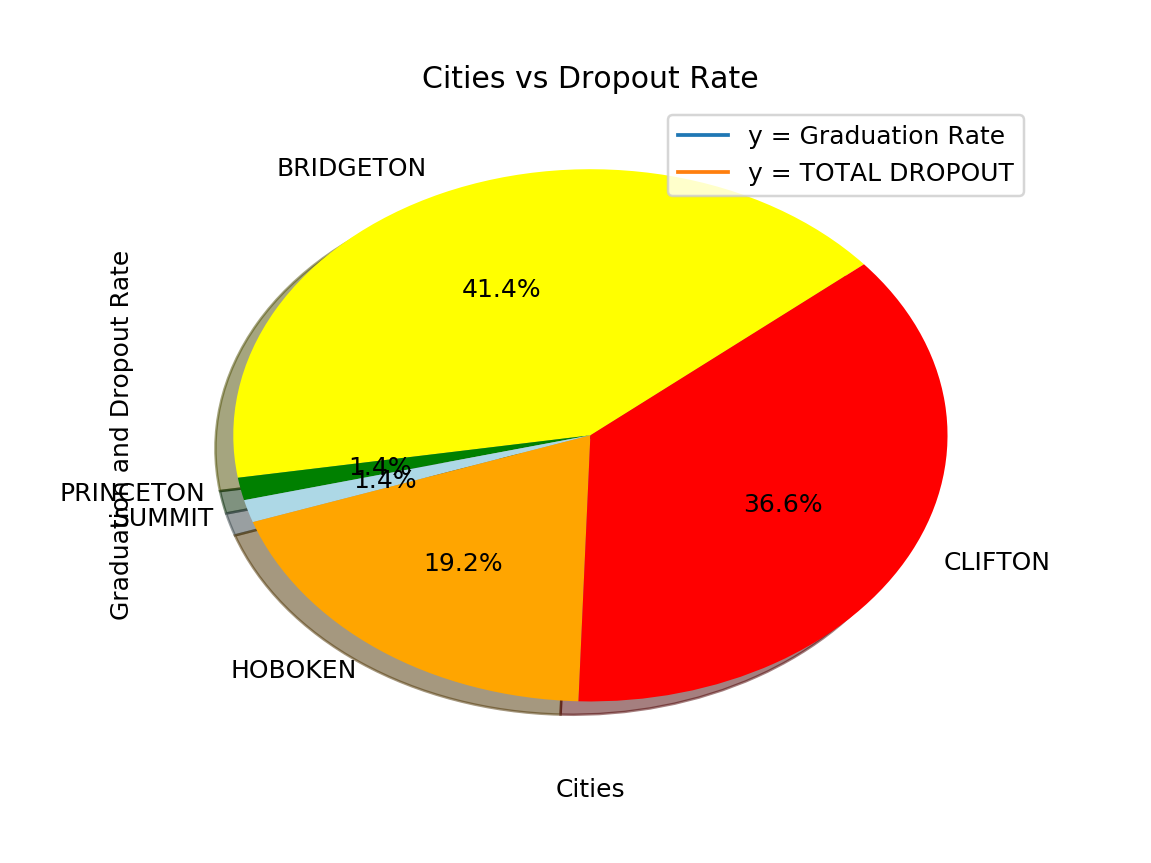

In [12]:
plt.plot(grad_vs_dropout["CITY"],grad_vs_dropout["GRAD_RATE"])
plt.plot(grad_vs_dropout["CITY"],grad_vs_dropout["TOTAL DROPOUT"])
plt.legend(['y = Graduation Rate', 'y = TOTAL DROPOUT'], loc='best')
xlabel('Cities')
ylabel('Graduation and Dropout Rate')
title('Graduation Vs Dropout Rate')
grid(True)
plt.savefig("gradvsdropout.png")
plt.show()

In [13]:
colors = ["yellow","green","lightblue","orange","red"]
plt.title("Cities vs Dropout Rate")
plt.pie(finaldropout_data["TOTAL DROPOUT"], labels=finaldropout_data["CITY"], colors=colors,autopct="%1.1f%%",
        startangle=40,shadow=True)
    
# Create axes which are equal so we have a perfect circle
#plt.axis("equal")
# Save an image of our chart and print the final product to the screen

plt.show()
plt.savefig("PyPies.png")